# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key+"&q="+city+"&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | acarau
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | chadron
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | coeur d'alene
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | bardai
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | manatutu
City not found. Skipping...
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | zaozersk
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 |

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acarau,-2.8856,-40.1200,25.99,80,30,8.68,BR,1690407795
1,Margate,51.3813,1.3862,15.17,93,100,4.02,GB,1690407883
2,Stanley,54.8680,-1.6985,13.62,89,40,1.03,GB,1690407709
3,Grytviken,-54.2811,-36.5092,-0.02,98,100,4.94,GS,1690407883
4,Chadron,42.8294,-102.9999,37.82,15,0,4.63,US,1690407884


In [40]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [41]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Acarau,-2.8856,-40.1200,25.99,80,30,8.68,BR,1690407795
1,Margate,51.3813,1.3862,15.17,93,100,4.02,GB,1690407883
2,Stanley,54.8680,-1.6985,13.62,89,40,1.03,GB,1690407709
3,Grytviken,-54.2811,-36.5092,-0.02,98,100,4.94,GS,1690407883
4,Chadron,42.8294,-102.9999,37.82,15,0,4.63,US,1690407884


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The r-squared value is: 0.021


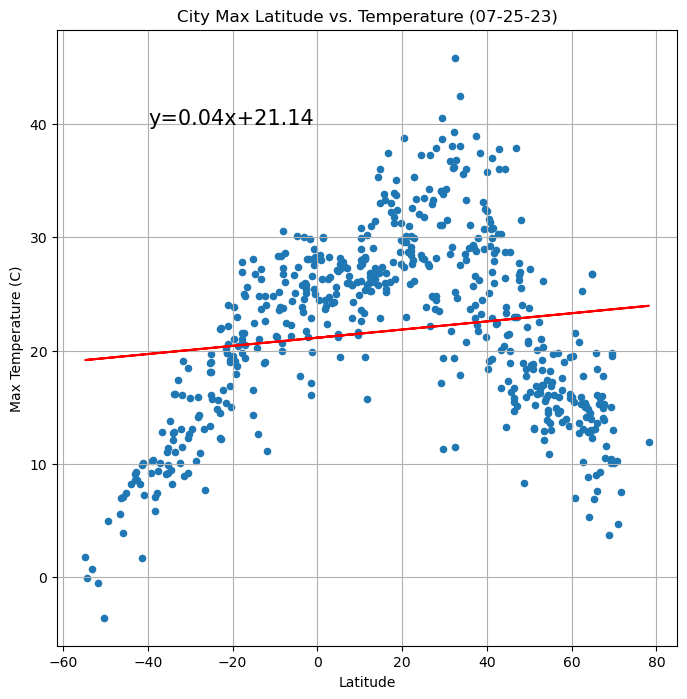

In [42]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter',x='Lat',y="Max Temp",grid=True,figsize=(8,8),title="City Max Latitude vs. Temperature (07-25-23)",xlabel="Latitude",ylabel="Max Temperature (C)")

# Incorporate the other graph properties
(slope,intercept,rvalue,pvalue,stderr)=linregress(city_data_df["Lat"],city_data_df["Max Temp"])
regress_values1=city_data_df["Lat"]*slope+intercept
line_eq1="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(city_data_df["Lat"],regress_values1,"r-")
plt.annotate(line_eq1,(-40,40),fontsize=15,color="black")
print(f"The r-squared value is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The r-squared value is: 0.0


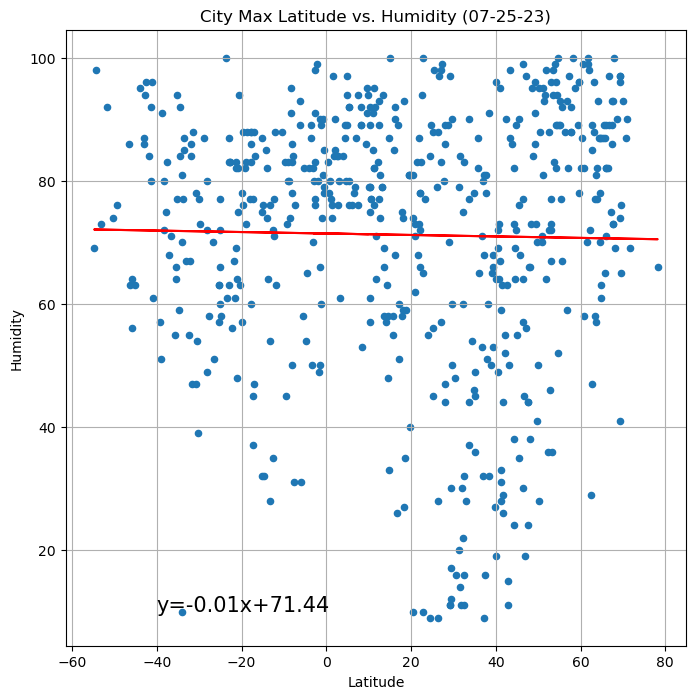

In [43]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter',x='Lat',y="Humidity",grid=True,figsize=(8,8),title="City Max Latitude vs. Humidity (07-25-23)",xlabel="Latitude",ylabel="Humidity")
# Incorporate the other graph properties
(slope,intercept,rvalue,pvalue,stderr)=linregress(city_data_df["Lat"],city_data_df["Humidity"])
regress_values2=city_data_df["Lat"]*slope+intercept
line_eq2="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(city_data_df["Lat"],regress_values2,"r-")
plt.annotate(line_eq2,(-40,10),fontsize=15,color="black")
print(f"The r-squared value is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The r-squared value is: 0.0


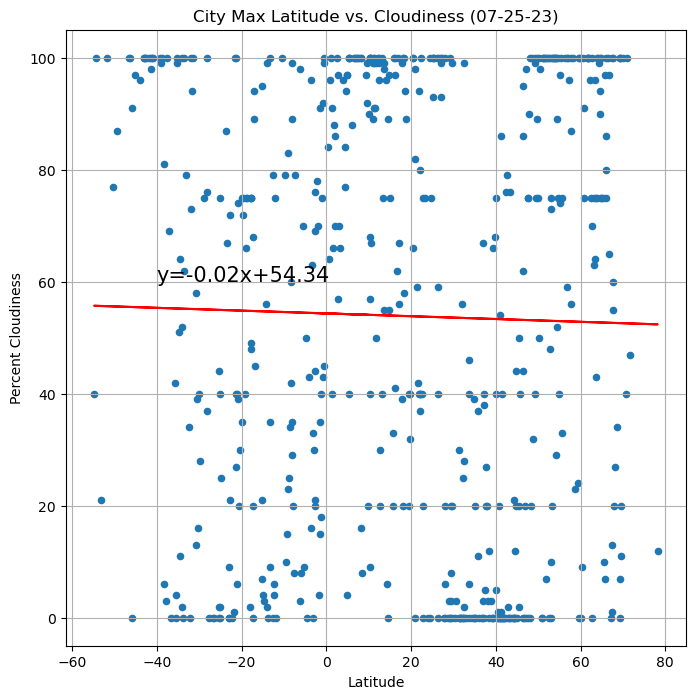

In [44]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter',x='Lat',y="Cloudiness",grid=True,figsize=(8,8),title="City Max Latitude vs. Cloudiness (07-25-23)",xlabel="Latitude",ylabel="Percent Cloudiness")

# Incorporate the other graph properties
(slope,intercept,rvalue,pvalue,stderr)=linregress(city_data_df["Lat"],city_data_df["Cloudiness"])
regress_values3=city_data_df["Lat"]*slope+intercept
line_eq3="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(city_data_df["Lat"],regress_values3,"r-")
plt.annotate(line_eq3,(-40,60),fontsize=15,color="black")
print(f"The r-squared value is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The r-squared value is: 0.028


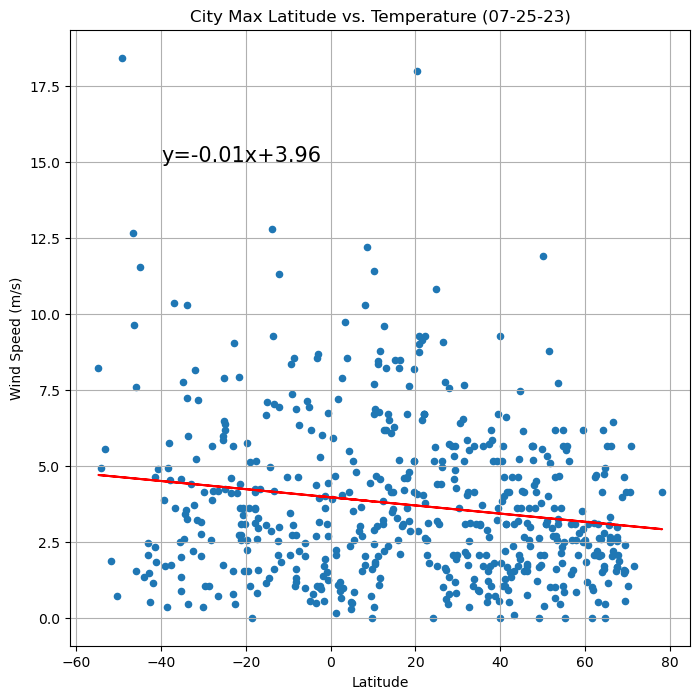

In [45]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter',x='Lat',y="Wind Speed",grid=True,figsize=(8,8),title="City Max Latitude vs. Temperature (07-25-23)",xlabel="Latitude",ylabel="Wind Speed (m/s)")

# Incorporate the other graph properties
(slope,intercept,rvalue,pvalue,stderr)=linregress(city_data_df["Lat"],city_data_df["Wind Speed"])
regress_values4=city_data_df["Lat"]*slope+intercept
line_eq4="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(city_data_df["Lat"],regress_values4,"r-")
plt.annotate(line_eq4,(-40,15),fontsize=15,color="black")
print(f"The r-squared value is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def plot_linear_regression ( x_values, y_values, text_coordinates):
      (slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
      regress_values=x_values*slope+intercept
      line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
      
      plt.plot(x_values,regress_values,"r-")
      plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
      print(f"The r value is: {round(rvalue,3)}")

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Margate,51.3813,1.3862,15.17,93,100,4.02,GB,1690407883
2,Stanley,54.8680,-1.6985,13.62,89,40,1.03,GB,1690407709
4,Chadron,42.8294,-102.9999,37.82,15,0,4.63,US,1690407884
6,Coeur D'Alene,47.6777,-116.7805,27.74,24,0,5.66,US,1690407885
7,Thompson,55.7435,-97.8558,16.09,67,75,5.66,CA,1690407885


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Acarau,-2.8856,-40.1200,25.99,80,30,8.68,BR,1690407795
3,Grytviken,-54.2811,-36.5092,-0.02,98,100,4.94,GS,1690407883
5,Puerto Natales,-51.7236,-72.4875,-0.48,92,100,1.87,CL,1690407884
10,Puerto Ayora,-0.7393,-90.3518,28.98,90,92,2.68,EC,1690407886
12,Edinburgh Of The Seven Seas,-37.0676,-12.3116,10.06,68,69,10.36,SH,1690407887


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.623


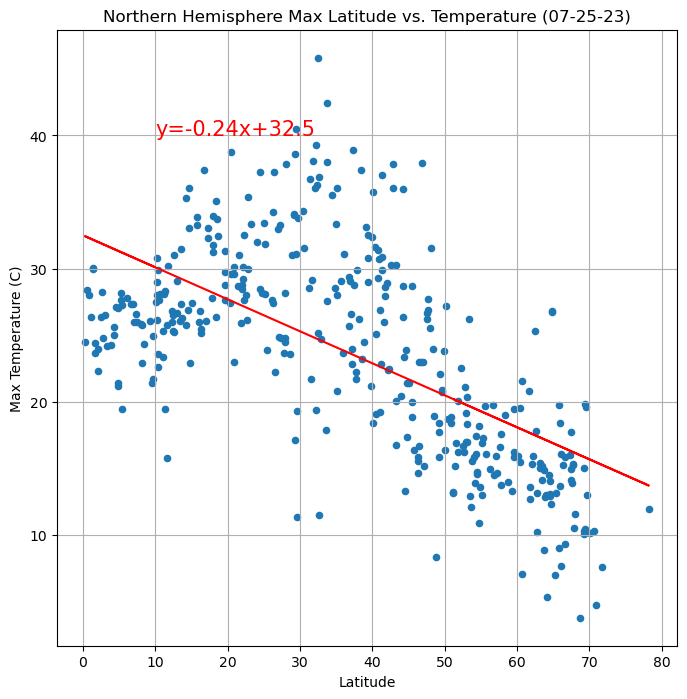

In [64]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind='scatter',x='Lat',y="Max Temp",grid=True,figsize=(8,8),title="Northern Hemisphere Max Latitude vs. Temperature (07-25-23)",xlabel="Latitude",ylabel="Max Temperature (C)")
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],(10,40))

The r value is: 0.883


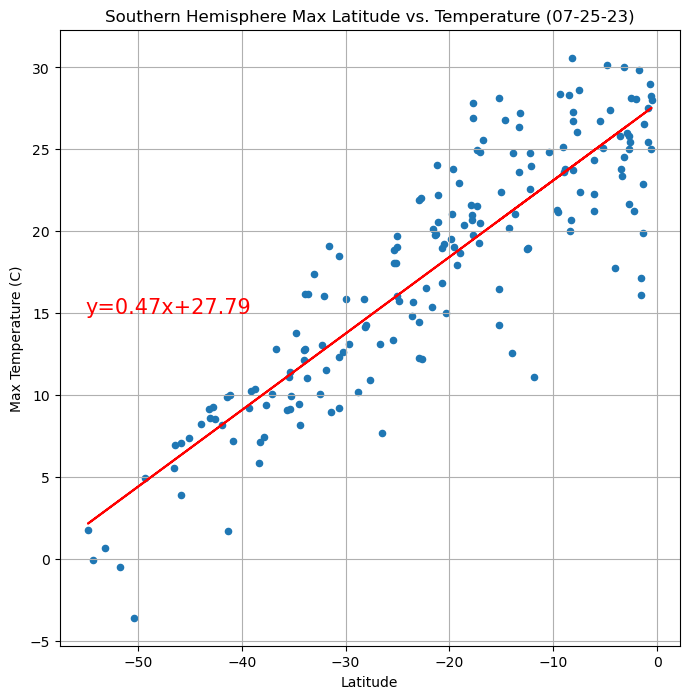

In [67]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind='scatter',x='Lat',y="Max Temp",grid=True,figsize=(8,8),title="Southern Hemisphere Max Latitude vs. Temperature (07-25-23)",xlabel="Latitude",ylabel="Max Temperature (C)")
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],(-55,15))

**Discussion about the linear relationship:** 
The linear regression shows that the further you get from the equator, the lower the maximum temperature. The r value indicates that there is more variability in maximum temperature for the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.053


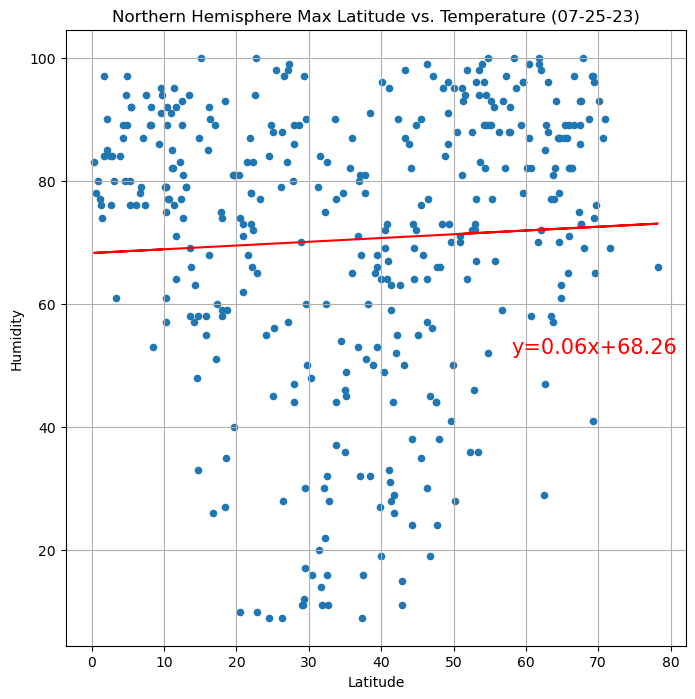

In [68]:
# Northern Hemisphere
northern_hemi_df.plot(kind='scatter',x='Lat',y="Humidity",grid=True,figsize=(8,8),title="Northern Hemisphere Max Latitude vs. Humidity (07-25-23)",xlabel="Latitude",ylabel="Humidity")
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],(58,52))

The r value is: -0.011


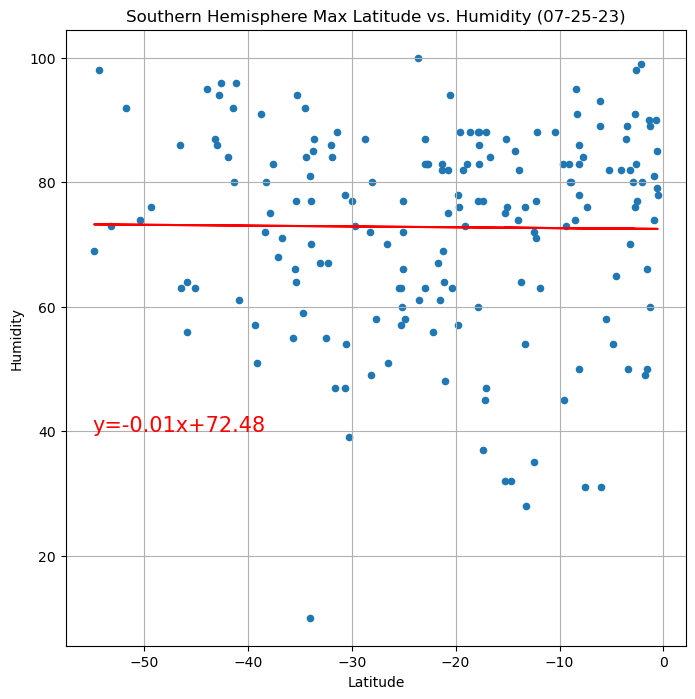

In [72]:
# Southern Hemisphere
southern_hemi_df.plot(kind='scatter',x='Lat',y="Humidity",grid=True,figsize=(8,8),title="Southern Hemisphere Max Latitude vs. Humidity (07-25-23)",xlabel="Latitude",ylabel="Humidity")
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],(-55,40))

**Discussion about the linear relationship:** 
There is no quantifiable correlation between distance from the equator and humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.087


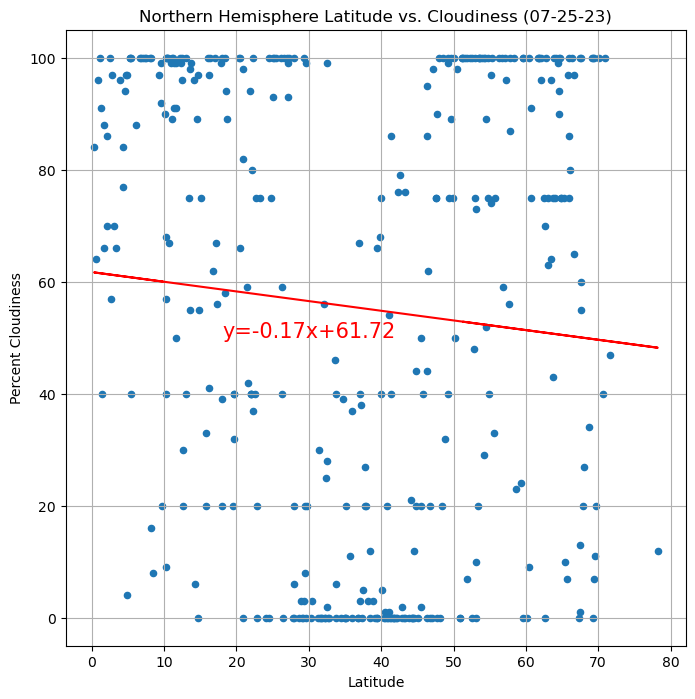

In [74]:
# Northern Hemisphere
northern_hemi_df.plot(kind='scatter',x='Lat',y="Cloudiness",grid=True,figsize=(8,8),title="Northern Hemisphere Latitude vs. Cloudiness (07-25-23)",xlabel="Latitude",ylabel="Percent Cloudiness")
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],(18,50))

The r value is: -0.237


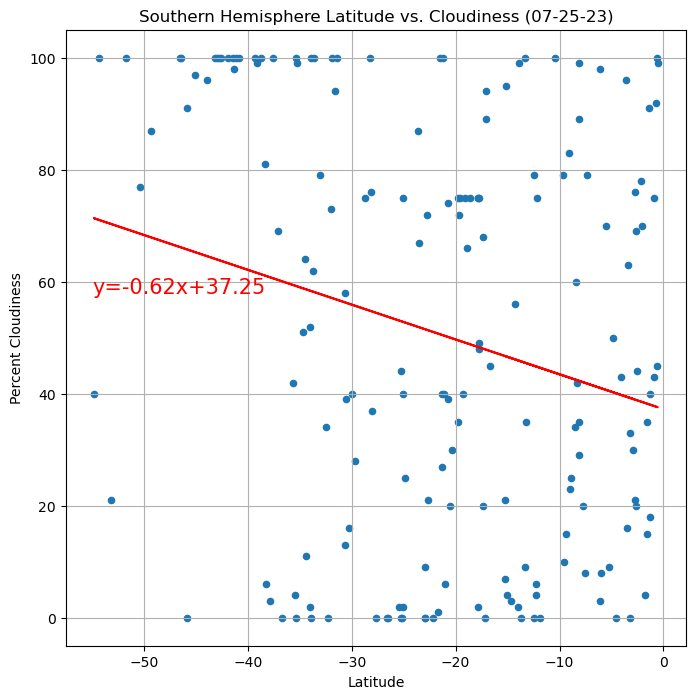

In [77]:
# Southern Hemisphere
southern_hemi_df.plot(kind='scatter',x='Lat',y="Cloudiness",grid=True,figsize=(8,8),title="Southern Hemisphere Latitude vs. Cloudiness (07-25-23)",xlabel="Latitude",ylabel="Percent Cloudiness")
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],(-55,58))

**Discussion about the linear relationship:** 
There is no significant correlation between latitude and percent cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.243


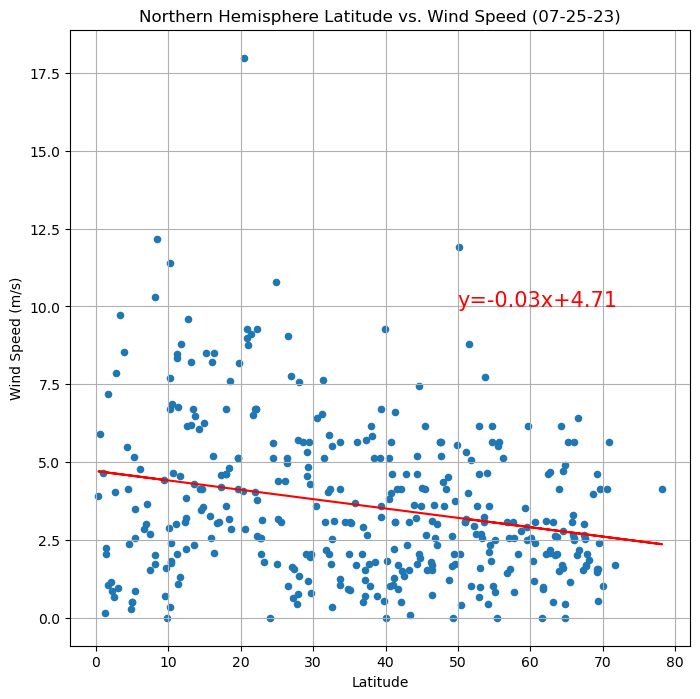

In [84]:
# Northern Hemisphere
northern_hemi_df.plot(kind='scatter',x='Lat',y="Wind Speed",grid=True,figsize=(8,8),title="Northern Hemisphere Latitude vs. Wind Speed (07-25-23)",xlabel="Latitude",ylabel="Wind Speed (m/s)")
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],(50,10))

The r value is: -0.142


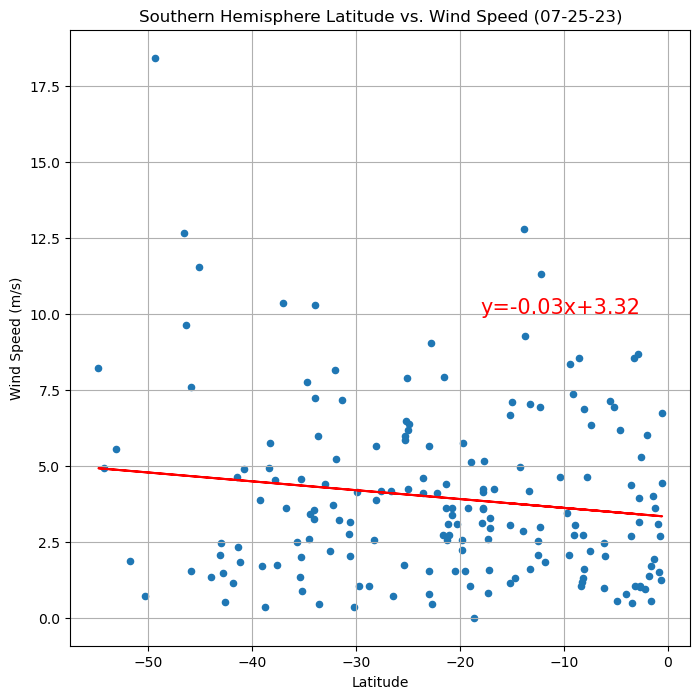

In [86]:
# Southern Hemisphere
southern_hemi_df.plot(kind='scatter',x='Lat',y="Wind Speed",grid=True,figsize=(8,8),title="Southern Hemisphere Latitude vs. Wind Speed (07-25-23)",xlabel="Latitude",ylabel="Wind Speed (m/s)")
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],(-18,10))

**Discussion about the linear relationship:** 
There is a slight correlation between latitude and wind speed.